In [1]:
!pip install -q scipy matplotlib
import torch_kan, torch
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


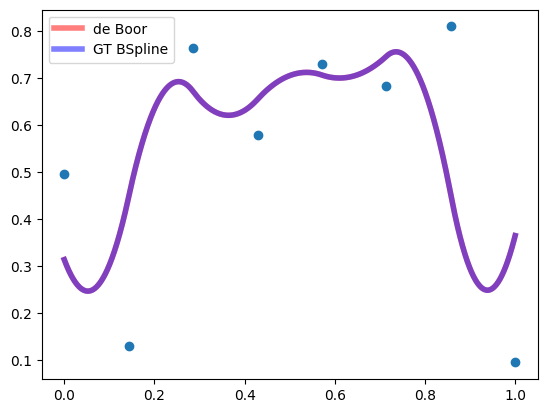

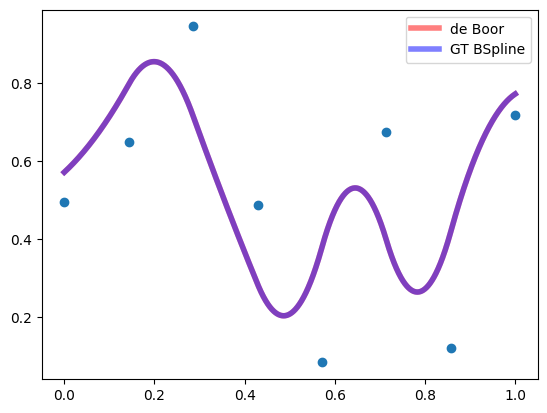

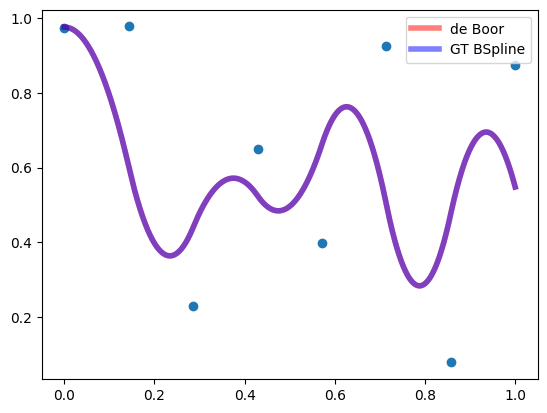

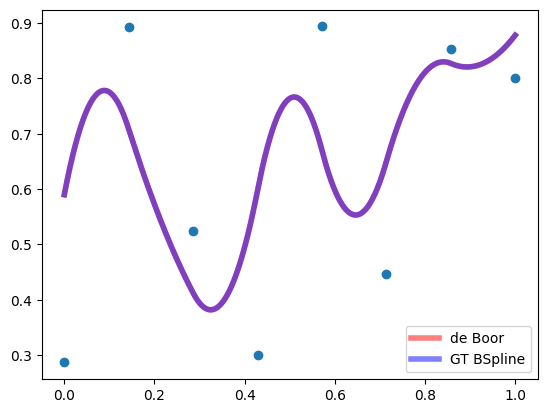

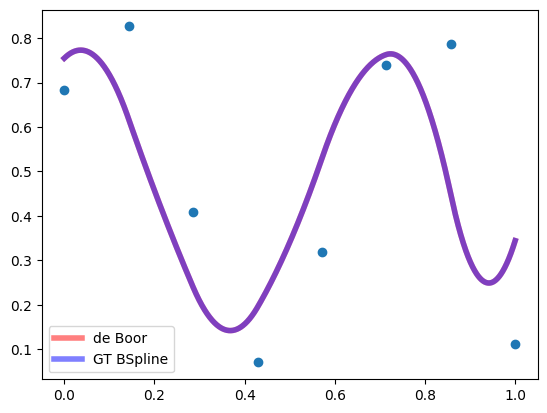

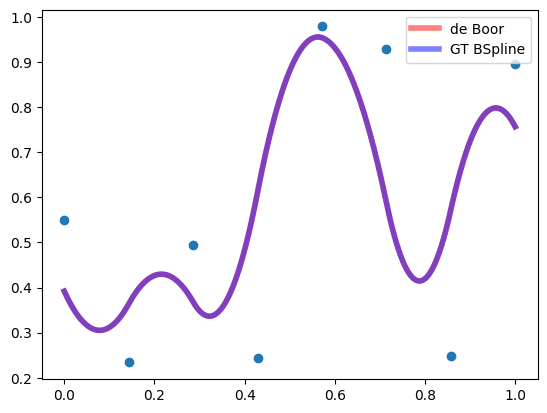

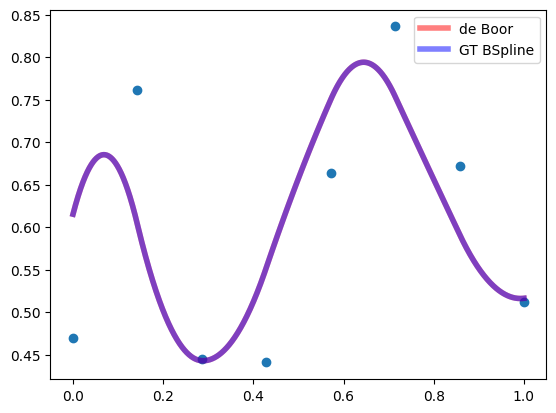

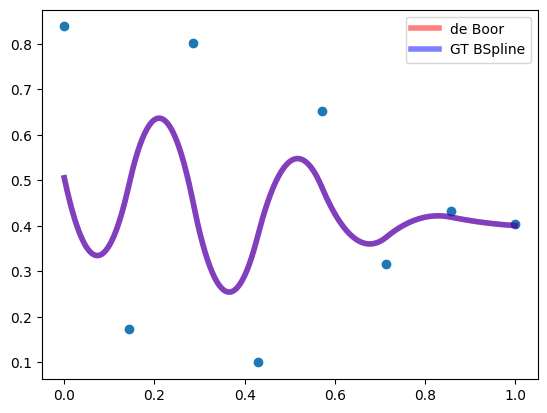

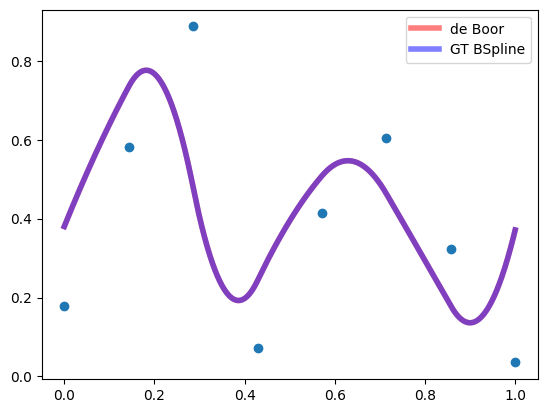

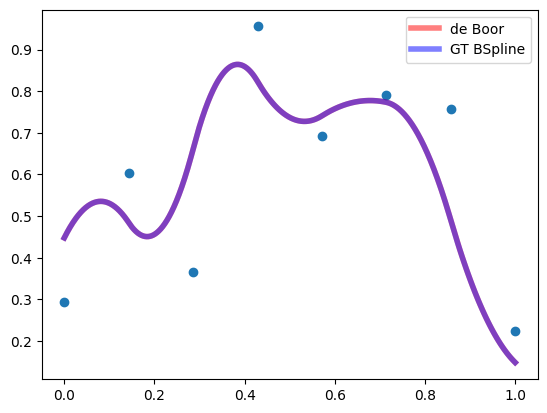

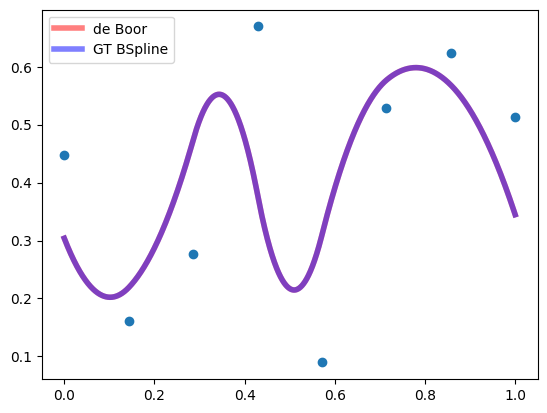

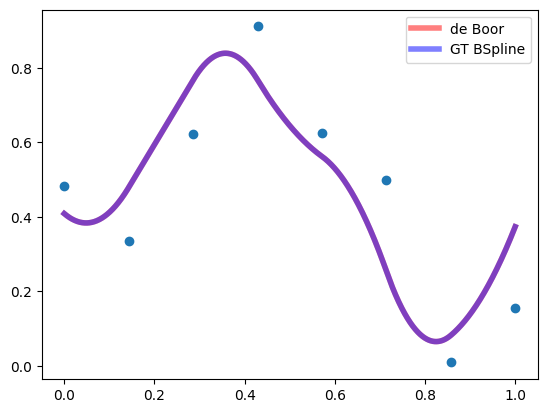

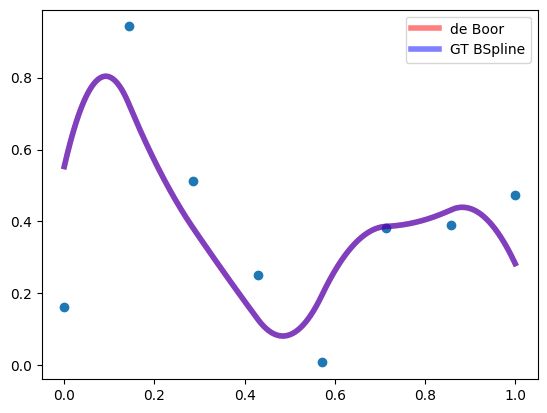

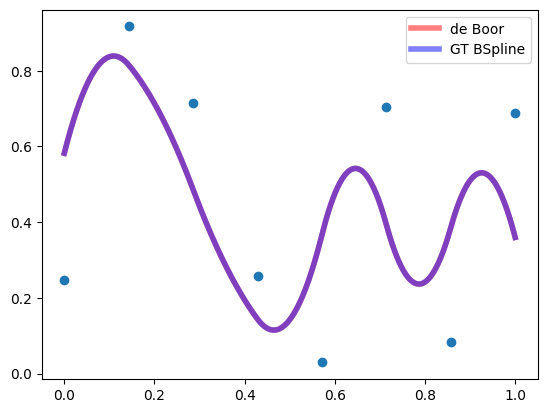

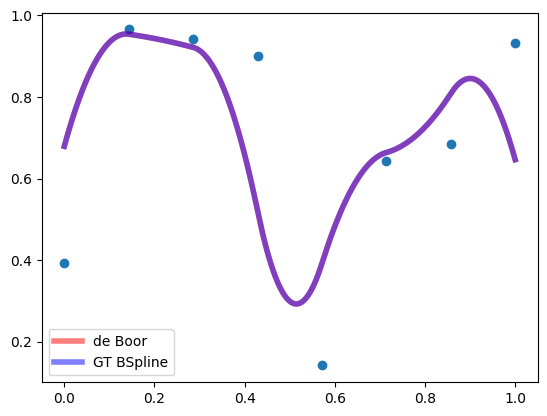

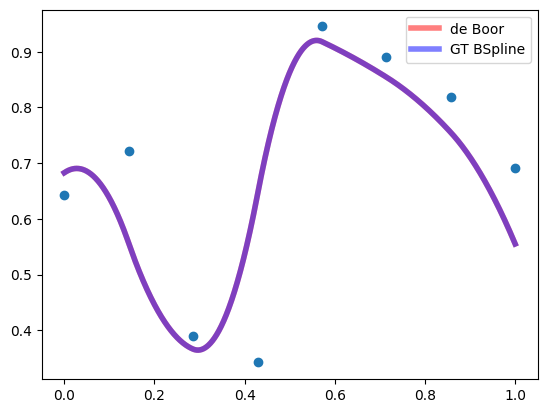

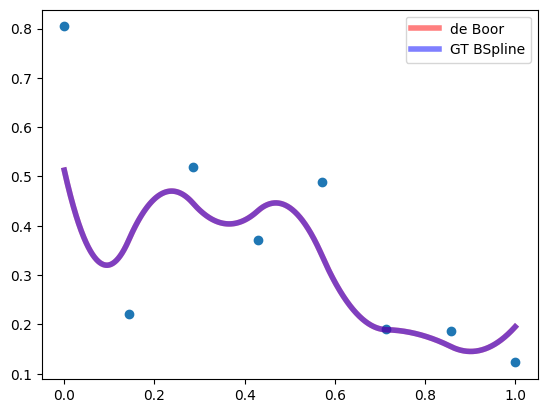

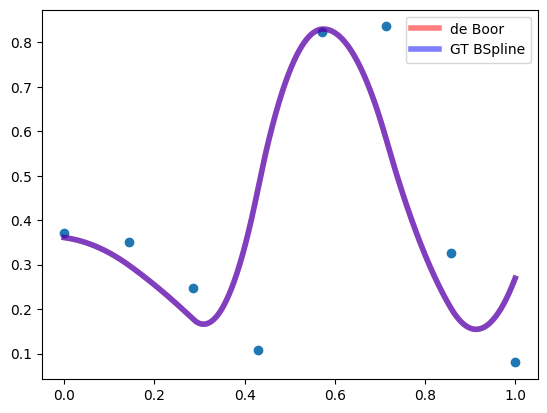

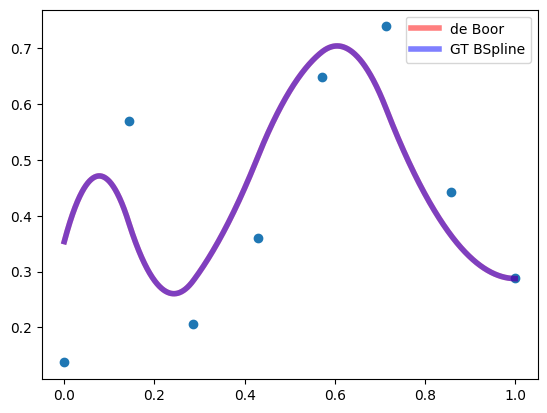

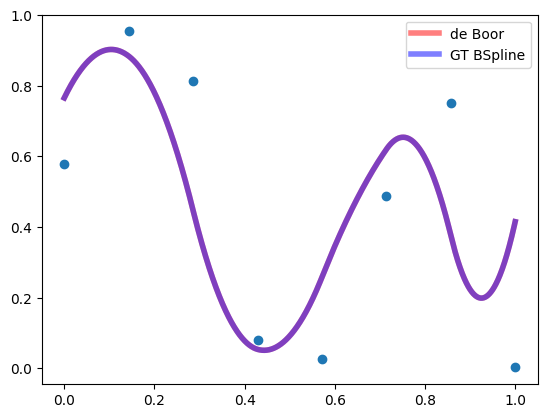

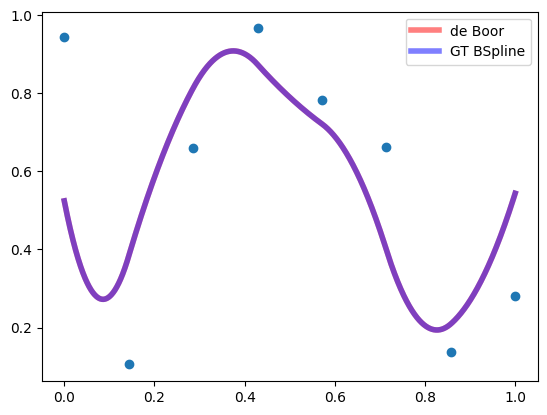

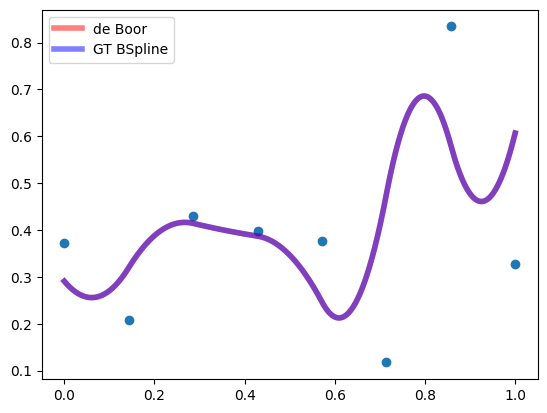

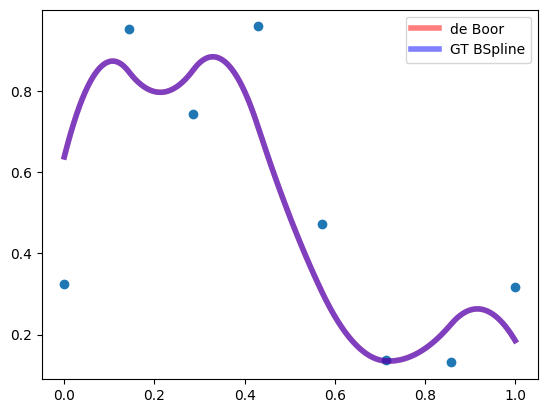

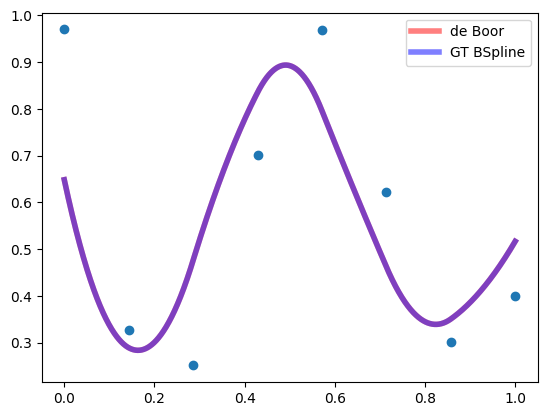

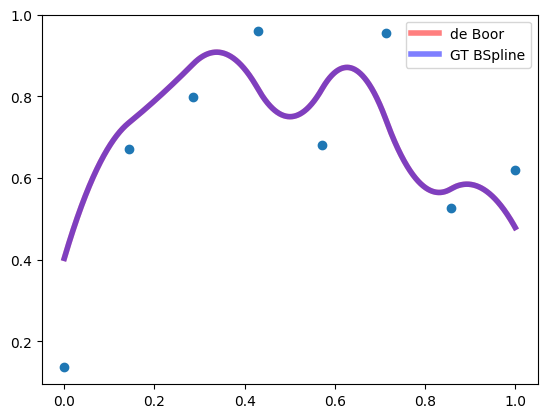

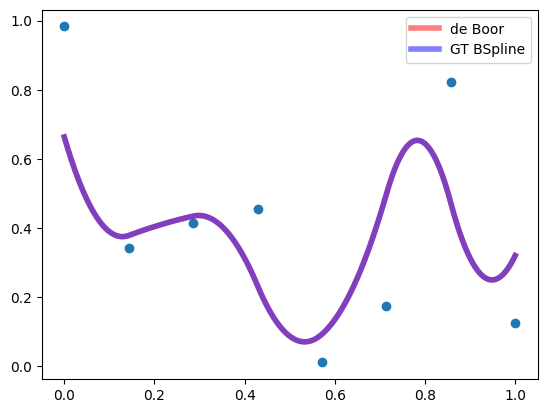

In [2]:
# B Splines parameters
B = 26
inDim = 9
k = 2

# B Splines inputs :
# -> x : x-axis evaluation points of the estimated BSplines curve
# -> cp : control points of BSplines
nEval = 1600
xr = torch.linspace(0, 1, nEval).unsqueeze(0).expand(B, -1)
cp = torch.rand(B, inDim)

# Note that B-Splines are estimated for inDim regular control points inside [0,1]
# The range for x-axis evaluation points is [0,1] as well
# We can compute points outside [0,1] but the curve will be extrapolated using the corresponding extrema splines
splines = torch_kan.BatchedBSplines(inDim, k)
ans = splines(xr, cp)
for b in range(B):
    plt.plot(xr[b], ans[b], "r-", lw=4, alpha=0.5, label="de Boor")
    plt.plot(
        xr[b],
        BSpline(splines.t.numpy(), cp[b], k)(
            xr[b]
        ),  # We check that the generated B-splines are correct with scipy implementation
        "b-",
        lw=4,
        alpha=0.5,
        label="GT BSpline",
    )
    plt.scatter(splines.t[k:-k], cp[b, :-1])
    plt.legend(loc="best")
    plt.show()